In [5]:
import sys
import os
import pandas as pd
sys.path.append(os.path.abspath('../Scripts'))


from Models_with_k_fold import ModelEvaluator

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Mean AUC across all folds: 0.87

Metrics for Random Forest:
Accuracy: 0.92
Precision: 0.94
Recall: 0.88
F1 Score: 0.91
ROC AUC: 0.97
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
Gradient Boosting Mean AUC across all folds: 0.88

Metrics for Gradient Boosting:
Accuracy: 0.88
Precision: 0.94
Recall: 0.79
F1 Score: 0.86
ROC AUC: 0.96
Fitting 5 folds for each of 162 candidates, totalling 810 fits


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Mean AUC across all folds: 0.89

Metrics for XGBoost:
Accuracy: 0.94
Precision: 0.97
Recall: 0.91
F1 Score: 0.94
ROC AUC: 0.98
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVR: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVR Mean AUC across all folds: 0.88

Metrics for SVR:
Accuracy: 0.84
Precision: 0.86
Recall: 0.79
F1 Score: 0.82
ROC AUC: 0.89
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'sgd'}
MLP Mean AUC across all folds: 0.48

Metrics for MLP:
Accuracy: 0.53
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC AUC: 0.52


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Plot saved as roc_curve.png


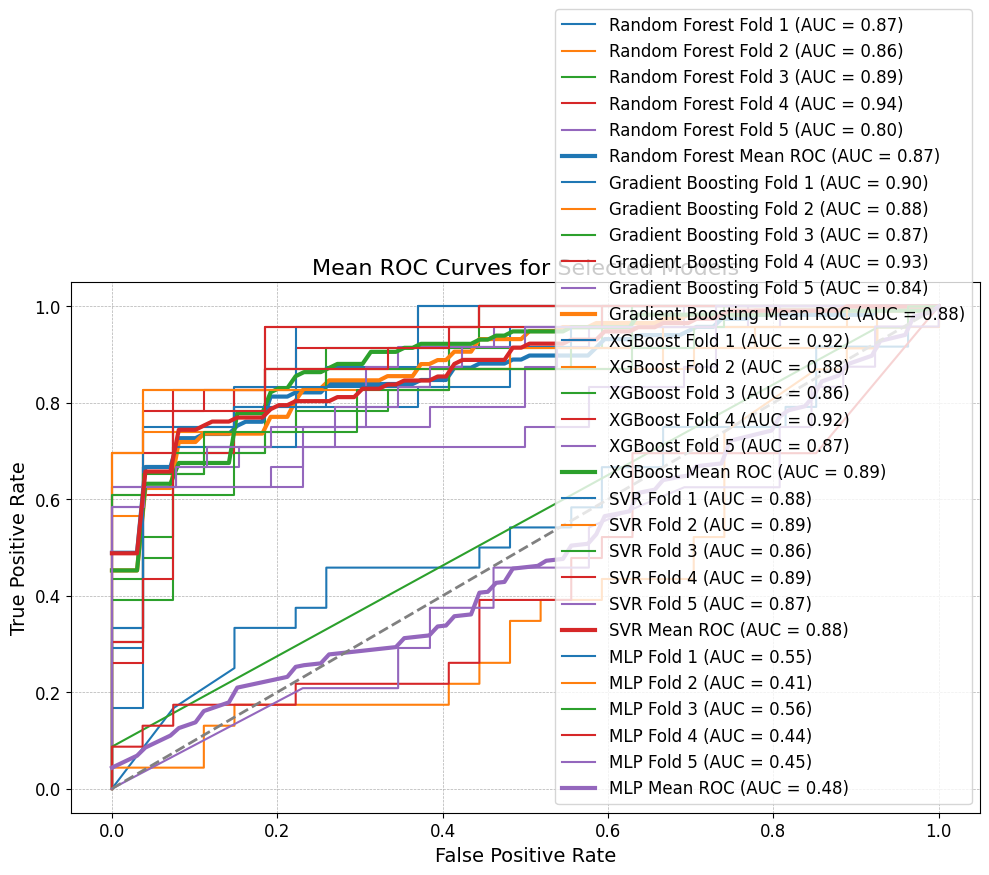

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data from the CSV file
data = pd.read_csv('../Data/merged_weekly_Gidami Primery Hospital..csv')

# Convert the 'date' column to a datetime object
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract useful components from the 'date' column
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.weekday
data['day_of_year'] = data['date'].dt.dayofyear

# Split into features (X) and target (y)
X = data.drop(columns=['Gidami Primery Hospital.', 'target', 'date'])  # Exclude the original 'date' column

# The 'target' column is the one you're trying to predict
y = data['target']

# Optionally, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use the ModelEvaluator with X_train and y_train
evaluator = ModelEvaluator(X_train, y_train)
evaluator.plot_roc()